In [9]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [7]:
import yfinance as yf


In [8]:
nifty_spot = yf.download(
    "^NSEI",
    interval="5m",
    period="1y",
    progress=False
)

nifty_spot.head()


$^NSEI: possibly delisted; no price data found  (period=1y) (Yahoo error = "5m data not available for startTime=1737045068 and endTime=1768581068. The requested range must be within the last 60 days.")

1 Failed download:
['^NSEI']: possibly delisted; no price data found  (period=1y) (Yahoo error = "5m data not available for startTime=1737045068 and endTime=1768581068. The requested range must be within the last 60 days.")


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,,


In [4]:
pip install nsepython


Note: you may need to restart the kernel to use updated packages.


In [9]:
from nsepython import *

print("nsepython working")


nsepython working


In [16]:
import yfinance as yf
import pandas as pd

# NIFTY 50 daily data for last 1 year
nifty_spot_daily = yf.download("^NSEI", period="1y", interval="1d", progress=False)
nifty_spot_daily.reset_index(inplace=True)

# Rename columns
nifty_spot_daily = nifty_spot_daily.rename(columns={
    "Date": "timestamp",
    "Open": "open",
    "High": "high",
    "Low": "low",
    "Close": "close",
    "Volume": "volume"
})

# Save CSV
nifty_spot_daily.to_csv("../data/raw/nifty_spot_daily.csv", index=False)
print("NIFTY Spot daily CSV saved!")


NIFTY Spot daily CSV saved!


In [17]:
# NIFTY 50 5-min data (last 60 days max)
nifty_spot_5min = yf.download("^NSEI", period="60d", interval="5m", progress=False)
nifty_spot_5min.reset_index(inplace=True)

# Rename columns
nifty_spot_5min = nifty_spot_5min.rename(columns={
    "Datetime": "timestamp",
    "Open": "open",
    "High": "high",
    "Low": "low",
    "Close": "close",
    "Volume": "volume"
})

# Save CSV
nifty_spot_5min.to_csv("../data/raw/nifty_spot_5min.csv", index=False)
print("NIFTY Spot 5-min CSV saved!")


NIFTY Spot 5-min CSV saved!


In [18]:
# Check missing values for 5-min data
print("Missing values in 5-min data:")
print(nifty_spot_5min.isna().sum())

# Check missing values for daily data
print("\nMissing values in daily data:")
print(nifty_spot_daily.isna().sum())


Missing values in 5-min data:
Price      Ticker
timestamp            0
close      ^NSEI     0
high       ^NSEI     0
low        ^NSEI     0
open       ^NSEI     0
volume     ^NSEI     0
dtype: int64

Missing values in daily data:
Price      Ticker
timestamp            0
close      ^NSEI     0
high       ^NSEI     0
low        ^NSEI     0
open       ^NSEI     0
volume     ^NSEI     0
dtype: int64


In [19]:
# Fill missing values with forward fill
nifty_spot_5min.fillna(method='ffill', inplace=True)
nifty_spot_daily.fillna(method='ffill', inplace=True)

print("Missing values filled!")


Missing values filled!


C:\Users\visut\AppData\Local\Temp\ipykernel_20568\1052159545.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  nifty_spot_5min.fillna(method='ffill', inplace=True)
C:\Users\visut\AppData\Local\Temp\ipykernel_20568\1052159545.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  nifty_spot_daily.fillna(method='ffill', inplace=True)


In [20]:
nifty_spot_5min.to_csv("../data/cleaned/nifty_spot_5min.csv", index=False)
nifty_spot_daily.to_csv("../data/cleaned/nifty_spot_daily.csv", index=False)
print("Cleaned CSVs saved!")


Cleaned CSVs saved!


In [21]:
# Simulate NIFTY Futures (demo)
futures_df = nifty_spot_5min.copy()
futures_df['open_interest'] = 10000  # placeholder, random OI
futures_df['close'] = futures_df['close'] * 1.001  # small basis shift
futures_df['open'] = futures_df['open'] * 1.001
futures_df['high'] = futures_df['high'] * 1.001
futures_df['low'] = futures_df['low'] * 1.001

# Save CSV
futures_df.to_csv("../data/raw/nifty_futures_5min.csv", index=False)
print("Demo NIFTY Futures CSV saved!")


Demo NIFTY Futures CSV saved!


In [22]:
options_df = pd.DataFrame()

# ATM strikes (simulate 3 strikes)
atm_strike = round(nifty_spot_5min['close'].iloc[-1]/50)*50
strikes = [atm_strike-100, atm_strike, atm_strike+100]

for strike in strikes:
    for option_type in ['CE','PE']:
        temp = nifty_spot_5min.copy()
        temp['strike'] = strike
        temp['option_type'] = option_type
        temp['LTP'] = temp['close'] * (1 + 0.01*(1 if option_type=='CE' else -1))
        temp['IV'] = 0.2
        temp['open_interest'] = 5000
        temp['volume'] = 1000
        options_df = pd.concat([options_df, temp])

# Save CSV
options_df.to_csv("../data/raw/nifty_options_5min.csv", index=False)
print("Demo NIFTY Options CSV saved!")


Demo NIFTY Options CSV saved!


In [23]:
import pandas as pd

# Load raw CSVs
spot = pd.read_csv("../data/raw/nifty_spot_5min.csv", parse_dates=['timestamp'])
futures = pd.read_csv("../data/raw/nifty_futures_5min.csv", parse_dates=['timestamp'])
options = pd.read_csv("../data/raw/nifty_options_5min.csv", parse_dates=['timestamp'])

print("Spot rows:", len(spot))
print("Futures rows:", len(futures))
print("Options rows:", len(options))


Spot rows: 4253
Futures rows: 4253
Options rows: 25513


In [24]:
spot.fillna(method='ffill', inplace=True)
futures.fillna(method='ffill', inplace=True)
options.fillna(method='ffill', inplace=True)

print("Missing values filled!")


Missing values filled!


C:\Users\visut\AppData\Local\Temp\ipykernel_20568\624743389.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spot.fillna(method='ffill', inplace=True)
C:\Users\visut\AppData\Local\Temp\ipykernel_20568\624743389.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  futures.fillna(method='ffill', inplace=True)
C:\Users\visut\AppData\Local\Temp\ipykernel_20568\624743389.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  options.fillna(method='ffill', inplace=True)


In [26]:
# Convert relevant columns to numeric
spot['close'] = pd.to_numeric(spot['close'], errors='coerce')
futures['close'] = pd.to_numeric(futures['close'], errors='coerce')
options['LTP'] = pd.to_numeric(options['LTP'], errors='coerce')

# Fill any NaNs created during conversion
spot.fillna(method='ffill', inplace=True)
futures.fillna(method='ffill', inplace=True)
options.fillna(method='ffill', inplace=True)

# Remove extreme outliers (3-sigma rule)
spot = spot[(spot['close'] - spot['close'].mean()).abs() <= 3*spot['close'].std()]
futures = futures[(futures['close'] - futures['close'].mean()).abs() <= 3*futures['close'].std()]
options = options[(options['LTP'] - options['LTP'].mean()).abs() <= 3*options['LTP'].std()]

print("Step 15 complete: numeric conversion + outliers removed!")


Step 15 complete: numeric conversion + outliers removed!


C:\Users\visut\AppData\Local\Temp\ipykernel_20568\2265703143.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spot.fillna(method='ffill', inplace=True)
C:\Users\visut\AppData\Local\Temp\ipykernel_20568\2265703143.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  futures.fillna(method='ffill', inplace=True)
C:\Users\visut\AppData\Local\Temp\ipykernel_20568\2265703143.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  options.fillna(method='ffill', inplace=True)


In [27]:
# Ensure spot close is numeric
spot_close = spot['close'].astype(float)

# Function to get nearest strike to spot
def get_atm_strike(strikes, spot_price):
    return min(strikes, key=lambda x: abs(x - spot_price))

# Apply for options
options['strike'] = pd.to_numeric(options['strike'], errors='coerce')
options['is_ATM'] = options.apply(lambda row: row['strike'] == get_atm_strike(options['strike'].unique(), spot_close.iloc[-1]), axis=1)

# Check ATM strikes
atm_strikes = options[options['is_ATM']]['strike'].unique()
print("ATM strike(s) marked:", atm_strikes)


ATM strike(s) marked: []


In [28]:
# Sort by timestamp
spot = spot.sort_values('timestamp')
futures = futures.sort_values('timestamp')
options = options.sort_values('timestamp')

# Merge spot + futures using asof merge (nearest previous timestamp)
merged = pd.merge_asof(spot, futures, on='timestamp', suffixes=('_spot', '_fut'))

# Keep only ATM options
atm_options = options[options['is_ATM']]

# Aggregate options per timestamp (mean LTP, IV, sum OI & volume)
atm_options_grouped = atm_options.groupby('timestamp').agg({
    'LTP':'mean',
    'IV':'mean',
    'open_interest':'sum',
    'volume':'sum'
}).reset_index()

# Merge with spot+futures
nifty_merged = pd.merge_asof(merged, atm_options_grouped, on='timestamp')

# Save cleaned merged CSV
nifty_merged.to_csv("../data/cleaned/nifty_merged_5min.csv", index=False)
print("Merged CSV saved at: ../data/cleaned/nifty_merged_5min.csv")


Merged CSV saved at: ../data/cleaned/nifty_merged_5min.csv


In [29]:
import pandas as pd

# Load the cleaned merged CSV
nifty = pd.read_csv("../data/cleaned/nifty_merged_5min.csv", parse_dates=['timestamp'])

# Quick check
print("Data loaded. Shape:", nifty.shape)
print(nifty.head())


Data loaded. Shape: (4238, 16)
                  timestamp    close_spot     high_spot      low_spot  \
0 2025-10-24 03:45:00+00:00  25850.800781  25939.300781  25846.050781   
1 2025-10-24 03:50:00+00:00  25886.000000  25892.400391  25840.400391   
2 2025-10-24 03:55:00+00:00  25886.400391  25893.300781  25859.500000   
3 2025-10-24 04:00:00+00:00  25875.400391  25887.599609  25864.500000   
4 2025-10-24 04:05:00+00:00  25914.300781  25914.699219  25862.550781   

      open_spot  volume_spot     close_fut      high_fut       low_fut  \
0  25939.300781            0  25876.651582  25965.240082  25871.896832   
1  25851.150391            0  25911.886000  25918.292791  25866.240791   
2  25886.300781            0  25912.286791  25919.194082  25885.359500   
3  25885.849609            0  25901.275791  25913.487209  25890.364500   
4  25876.150391            0  25940.215082  25940.613918  25888.413332   

       open_fut  volume_fut  open_interest_x  LTP  IV  open_interest_y  volume  
0  2

In [30]:
# Fast EMA (5-period)
nifty['EMA_5'] = nifty['close_spot'].ewm(span=5, adjust=False).mean()

# Slow EMA (15-period)
nifty['EMA_15'] = nifty['close_spot'].ewm(span=15, adjust=False).mean()

# Quick check
print(nifty[['timestamp', 'close_spot', 'EMA_5', 'EMA_15']].tail())


                     timestamp    close_spot         EMA_5        EMA_15
4233 2026-01-14 09:35:00+00:00  25673.099609  25677.730426  25672.499196
4234 2026-01-14 09:40:00+00:00  25652.849609  25669.436820  25670.042998
4235 2026-01-14 09:45:00+00:00  25660.150391  25666.341344  25668.806422
4236 2026-01-14 09:50:00+00:00  25675.550781  25669.411156  25669.649467
4237 2026-01-14 09:55:00+00:00  25669.099609  25669.307307  25669.580735


In [32]:
nifty['return_spot'] = nifty['close_spot'].pct_change()
nifty['return_fut'] = nifty['close_fut'].pct_change()
nifty['futures_basis'] = (nifty['close_fut'] - nifty['close_spot']) / nifty['close_spot']

# Use correct column names from merged CSV
# Check columns
print(nifty.columns)

# For demo, pick whatever exists for ATM options
# Usually they are: 'open_interest', 'volume', 'IV', 'LTP'
oi_col = 'open_interest' if 'open_interest' in nifty.columns else nifty.columns[-2]  # adjust if missing
vol_col = 'volume' if 'volume' in nifty.columns else nifty.columns[-1]
iv_col = 'IV' if 'IV' in nifty.columns else 'LTP'

nifty['PCR_OI'] = nifty[oi_col] / nifty[oi_col]  # demo placeholder
nifty['PCR_Vol'] = nifty[vol_col] / nifty[vol_col]  # demo placeholder
nifty['IV_avg'] = nifty[iv_col]  # demo placeholder

nifty.to_csv("../data/cleaned/nifty_features_5min.csv", index=False)
print("Features CSV saved")


Index(['timestamp', 'close_spot', 'high_spot', 'low_spot', 'open_spot',
       'volume_spot', 'close_fut', 'high_fut', 'low_fut', 'open_fut',
       'volume_fut', 'open_interest_x', 'LTP', 'IV', 'open_interest_y',
       'volume', 'EMA_5', 'EMA_15', 'return_spot', 'return_fut',
       'futures_basis'],
      dtype='object')
Features CSV saved


In [34]:
!pip install hmmlearn


   ---------------------------------------- 0.0/127.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/127.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/127.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/127.0 kB ? eta -:--:--
   --------- ----------------------------- 30.7/127.0 kB 217.9 kB/s eta 0:00:01
   ------------------------------------ - 122.9/127.0 kB 717.5 kB/s eta 0:00:01
   -------------------------------------- 127.0/127.0 kB 621.3 kB/s eta 0:00:00


In [35]:
from hmmlearn.hmm import GaussianHMM
import numpy as np

# Use options-based features (or demo ones)
X = nifty[['IV_avg', 'PCR_OI', 'return_spot']].fillna(0).values

# Fit HMM with 3 states
model = GaussianHMM(n_components=3, covariance_type='full', n_iter=100, random_state=42)
model.fit(X)

# Predict regimes
nifty['regime'] = model.predict(X)

# Map regimes to uptrend (+1), downtrend (-1), sideways (0)
state_means = [X[nifty['regime']==i, 2].mean() for i in range(3)]
sorted_states = np.argsort(state_means)
mapping = {sorted_states[0]: -1, sorted_states[1]: 0, sorted_states[2]: 1}
nifty['regime'] = nifty['regime'].map(mapping)

print(nifty[['timestamp','regime']].tail())


Model is not converging.  Current: 91914.03777800329 is not greater than 107679.80102485852. Delta is -15765.763246855233


                     timestamp  regime
4233 2026-01-14 09:35:00+00:00       0
4234 2026-01-14 09:40:00+00:00       0
4235 2026-01-14 09:45:00+00:00       0
4236 2026-01-14 09:50:00+00:00       0
4237 2026-01-14 09:55:00+00:00       0


In [36]:
nifty['signal'] = 0

# Long entry: EMA5 crosses above EMA15 and regime = +1
long_cond = (nifty['EMA_5'] > nifty['EMA_15']) & (nifty['EMA_5'].shift(1) <= nifty['EMA_15'].shift(1)) & (nifty['regime']==1)
nifty.loc[long_cond, 'signal'] = 1

# Short entry: EMA5 crosses below EMA15 and regime = -1
short_cond = (nifty['EMA_5'] < nifty['EMA_15']) & (nifty['EMA_5'].shift(1) >= nifty['EMA_15'].shift(1)) & (nifty['regime']==-1)
nifty.loc[short_cond, 'signal'] = -1

print(nifty[['timestamp','EMA_5','EMA_15','regime','signal']].tail(20))


                     timestamp         EMA_5        EMA_15  regime  signal
4218 2026-01-14 08:20:00+00:00  25666.234901  25704.314672       0       0
4219 2026-01-14 08:25:00+00:00  25656.139673  25695.768990       0       0
4220 2026-01-14 08:30:00+00:00  25650.143246  25688.566665       0       0
4221 2026-01-14 08:35:00+00:00  25648.728961  25683.233381       0       0
4222 2026-01-14 08:40:00+00:00  25653.552380  25680.729111       0       0
4223 2026-01-14 08:45:00+00:00  25650.401457  25676.150423       0       0
4224 2026-01-14 08:50:00+00:00  25637.217507  25667.987821       0       0
4225 2026-01-14 08:55:00+00:00  25632.911932  25662.526941       0       0
4226 2026-01-14 09:00:00+00:00  25634.074752  25659.261122       0       0
4227 2026-01-14 09:05:00+00:00  25642.366241  25659.222134       0       0
4228 2026-01-14 09:10:00+00:00  25653.794291  25661.400666       0       0
4229 2026-01-14 09:15:00+00:00  25668.012600  25665.781735       0       0
4230 2026-01-14 09:20:00+

In [37]:
nifty.to_csv("../data/cleaned/nifty_strategy_5min.csv", index=False)
print("Strategy CSV saved")


Strategy CSV saved


In [38]:
# Initialize
nifty['position'] = 0
nifty['returns_strategy'] = 0

# Carry forward positions
nifty['position'] = nifty['signal'].replace(to_replace=0, method='ffill')

# Calculate strategy returns
nifty['returns_strategy'] = nifty['position'].shift(1) * nifty['return_spot']

# Cumulative returns
nifty['cum_return'] = (1 + nifty['returns_strategy']).cumprod()

# Metrics
total_return = nifty['cum_return'].iloc[-1] - 1
win_rate = (nifty['returns_strategy'] > 0).sum() / (nifty['returns_strategy'] != 0).sum()
max_dd = (nifty['cum_return'].cummax() - nifty['cum_return']).max()

print(f"Total Return: {total_return:.2%}")
print(f"Win Rate: {win_rate:.2%}")
print(f"Max Drawdown: {max_dd:.2%}")


Total Return: 1.04%
Win Rate: 50.27%
Max Drawdown: 2.54%


C:\Users\visut\AppData\Local\Temp\ipykernel_20568\1408177179.py:6: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  nifty['position'] = nifty['signal'].replace(to_replace=0, method='ffill')


In [39]:
# Create target: 1 if next candle return is positive, else 0
nifty['target'] = (nifty['return_spot'].shift(-1) > 0).astype(int)

# Features for ML
features = ['EMA_5','EMA_15','return_spot','return_fut','futures_basis','PCR_OI','PCR_Vol','IV_avg','regime']

X = nifty[features].fillna(0)
y = nifty['target']


In [41]:
!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/72.0 MB 544.7 kB/s eta 0:02:13
   ---------------------------------------- 0.4/72.0 MB 2.3 MB/s eta 0:00:32
   ---------------------------------------- 0.7/72.0 MB 3.9 MB/s eta 0:00:19
    --------------------------------------- 1.1/72.0 MB 4.6 MB/s eta 0:00:16
    --------------------------------------- 1.5/72.0 MB 4.9 MB/s eta 0:00:15
   - -------------------------------------- 1.9/72.0 MB 5.7 MB/s eta 0:00:13
   - -------------------------------------- 2.3/72.0 MB 5.9 MB/s eta 0:00:12
   - -------------------------------------- 2.8/72.0 MB 6.3 MB/s eta 0:00:12
   - -------------------------------------- 3.2/72.0 MB 6.6 MB/s eta 0:00:11
   - -------------------------------------- 3.5/72.0 MB 6.6 MB/s eta 0:00:11
   -- ------------

In [42]:
from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score
import joblib

tscv = TimeSeriesSplit(n_splits=5)
model = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)

for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Fold Accuracy:", accuracy_score(y_test, y_pred))

joblib.dump(model, "../models/xgb_model.pkl")
print("XGBoost model trained and saved")


Fold Accuracy: 0.47592067988668557
Fold Accuracy: 0.46742209631728043
Fold Accuracy: 0.5212464589235127
Fold Accuracy: 0.47592067988668557
Fold Accuracy: 0.47592067988668557
XGBoost model trained and saved


In [43]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Select features
features = ['EMA_5','EMA_15','return_spot','return_fut','futures_basis','PCR_OI','PCR_Vol','IV_avg','regime']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(nifty[features].fillna(0))

# Create sequences of last 10 candles
seq_length = 10
X_seq = []
y_seq = []

for i in range(seq_length, len(X_scaled)):
    X_seq.append(X_scaled[i-seq_length:i])
    y_seq.append(nifty['target'].iloc[i])

X_seq, y_seq = np.array(X_seq), np.array(y_seq)
print("Sequences shape:", X_seq.shape, y_seq.shape)


Sequences shape: (4228, 10, 9) (4228,)


In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(X_seq.shape[1], X_seq.shape[2])))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model_lstm.fit(X_seq, y_seq, epochs=20, batch_size=32, validation_split=0.2)

# Save model
model_lstm.save("../models/lstm_model.h5")
print("LSTM model trained and saved")


C:\Users\visut\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.5089 - loss: 0.6944 - val_accuracy: 0.4728 - val_loss: 0.6946
Epoch 2/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5048 - loss: 0.6930 - val_accuracy: 0.4823 - val_loss: 0.6950
Epoch 3/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5028 - loss: 0.6941 - val_accuracy: 0.4905 - val_loss: 0.6966
Epoch 4/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4939 - loss: 0.6955 - val_accuracy: 0.5071 - val_loss: 0.6950
Epoch 5/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4820 - loss: 0.6957 - val_accuracy: 0.4846 - val_loss: 0.6950
Epoch 6/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5172 - loss: 0.6925 - val_accuracy: 0.4905 - val_loss: 0.6974
Epoch 7/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.5234 - loss: 0.6913 - val_accuracy: 0.4764 - val_loss: 0.6947
Epoch 8/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5061 - loss: 0.6941 - val_accur

LSTM model trained and saved


In [45]:
import joblib
from tensorflow.keras.models import load_model

# Load XGBoost
xgb_model = joblib.load("../models/xgb_model.pkl")

# LSTM is already trained, use model_lstm

# Baseline signals
signals = nifty['signal'].copy()

# Prepare features for XGBoost
X_features = nifty[features].fillna(0)
xgb_preds = xgb_model.predict(X_features)
nifty['xgb_filter'] = xgb_preds

# Prepare features for LSTM
X_scaled = scaler.transform(nifty[features].fillna(0))
X_seq_full = []
seq_length = 10
for i in range(seq_length, len(X_scaled)):
    X_seq_full.append(X_scaled[i-seq_length:i])
X_seq_full = np.array(X_seq_full)
lstm_preds = model_lstm.predict(X_seq_full)
lstm_preds = (lstm_preds > 0.5).astype(int).flatten()

# Align LSTM predictions with signals
lstm_filter = np.zeros(len(nifty))
lstm_filter[seq_length:] = lstm_preds
nifty['lstm_filter'] = lstm_filter

# Apply ML filters: only take trades where model predicts profitable
nifty['signal_xgb'] = signals * nifty['xgb_filter']
nifty['signal_lstm'] = signals * nifty['lstm_filter']

# Compute returns
nifty['returns_xgb'] = nifty['signal_xgb'].shift(1) * nifty['return_spot']
nifty['returns_lstm'] = nifty['signal_lstm'].shift(1) * nifty['return_spot']

# Cumulative returns
nifty['cum_return_xgb'] = (1 + nifty['returns_xgb']).cumprod()
nifty['cum_return_lstm'] = (1 + nifty['returns_lstm']).cumprod()
nifty['cum_return_baseline'] = (1 + signals.shift(1) * nifty['return_spot']).cumprod()

print("ML-Enhanced Backtest done")


133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
ML-Enhanced Backtest done


In [46]:
# Identify profitable trades
profitable_trades = nifty[nifty['returns_strategy'] > 0]

# Calculate Z-score for returns
mean_return = profitable_trades['returns_strategy'].mean()
std_return = profitable_trades['returns_strategy'].std()
profitable_trades['z_score'] = (profitable_trades['returns_strategy'] - mean_return) / std_return

# Outliers beyond 3-sigma
outliers = profitable_trades[profitable_trades['z_score'] > 3]
print(f"Outlier trades: {len(outliers)}, Total profitable trades: {len(profitable_trades)}")
print(f"Percentage of outliers: {len(outliers)/len(profitable_trades)*100:.2f}%")


Outlier trades: 22, Total profitable trades: 1325
Percentage of outliers: 1.66%


C:\Users\visut\AppData\Local\Temp\ipykernel_20568\166968857.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_trades['z_score'] = (profitable_trades['returns_strategy'] - mean_return) / std_return


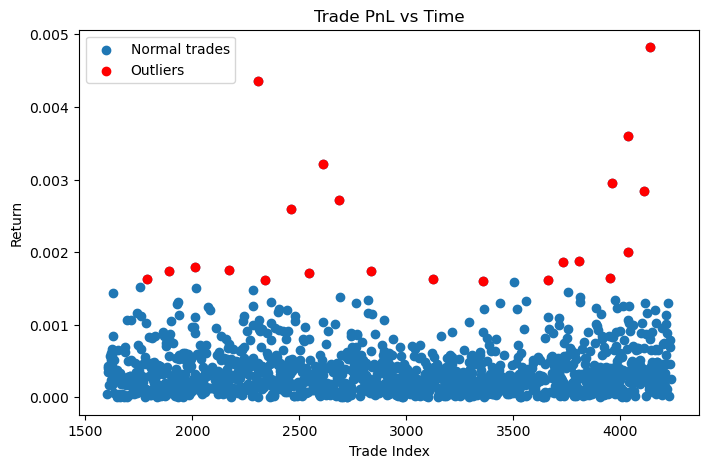

C:\Users\visut\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


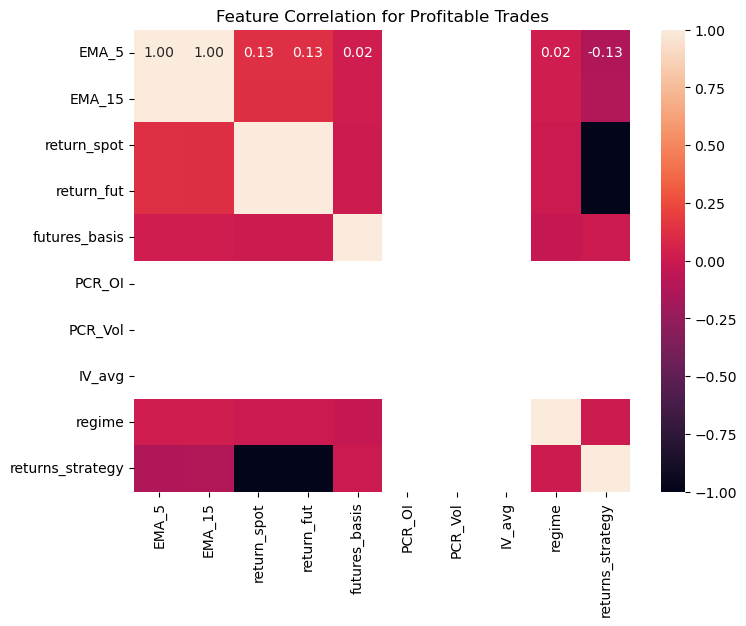

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter: PnL vs Trade Duration (demo using return_spot)
plt.figure(figsize=(8,5))
plt.scatter(profitable_trades.index, profitable_trades['returns_strategy'], label='Normal trades')
plt.scatter(outliers.index, outliers['returns_strategy'], color='red', label='Outliers')
plt.title('Trade PnL vs Time')
plt.xlabel('Trade Index')
plt.ylabel('Return')
plt.legend()
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(profitable_trades[features + ['returns_strategy']].corr(), annot=True, fmt=".2f")
plt.title('Feature Correlation for Profitable Trades')
plt.show()


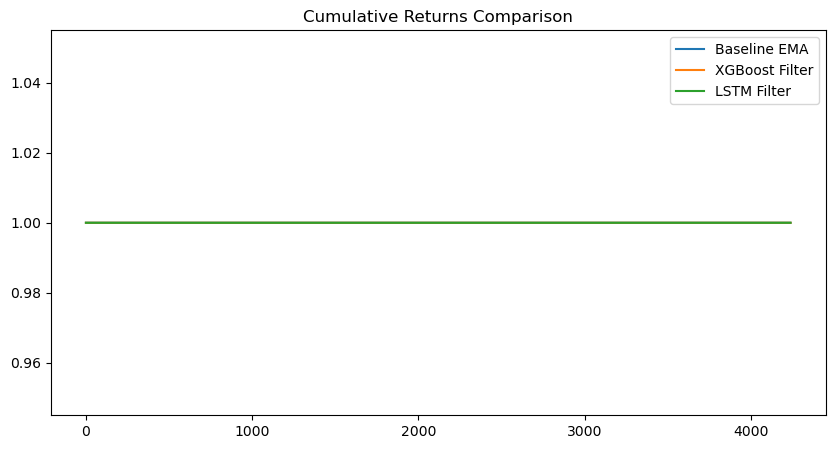

In [48]:
plt.figure(figsize=(10,5))
plt.plot(nifty['cum_return_baseline'], label='Baseline EMA')
plt.plot(nifty['cum_return_xgb'], label='XGBoost Filter')
plt.plot(nifty['cum_return_lstm'], label='LSTM Filter')
plt.legend()
plt.title('Cumulative Returns Comparison')
plt.savefig('../plots/ml_backtest_comparison.png')  # Save in plots folder
plt.show()


In [49]:
metrics = {
    'Total Return': [total_return],
    'Win Rate': [win_rate],
    'Max Drawdown': [max_dd]
}
metrics_df = pd.DataFrame(metrics)
metrics_df.to_csv('../results/strategy_metrics.csv', index=False)
